test

In [10]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [11]:
%run model.ipynb
%run support_methods.ipynb 

In [12]:
img_mr = nib.load('d:\\prostate\\semantic_MRs_anon\\Case_004_Week0_LFOV.nii.gz')

In [13]:
img_mr.shape

(256, 256, 128)

In [14]:
print(img_mr.get_data_dtype())

int32


In [16]:
print(img_mr)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 128)
affine: 
[[ -1.5625       0.           0.         207.25753784]
 [  0.          -1.5625       0.         205.93536377]
 [  0.           0.           1.55999756 -89.55769348]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        1.5625    1.5625    1.5599976 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration

In [17]:
data_mr = img_mr.get_fdata()
data_mr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [25]:
print(type(data_mr))
print(data_mr.ndim)
print(data_mr.shape)
print(data_mr.dtype)
print(np.amax(data_mr))
print(np.amin(data_mr))

<class 'numpy.ndarray'>
3
(256, 256, 128)
float64
478.0
0.0


In [29]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

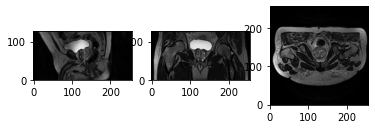

In [34]:
slice_0 = data_mr[127, :, :]
slice_1 = data_mr[:, 127, :]
slice_2 = data_mr[:, :, 63]

show_slices([slice_0, slice_1, slice_2])

In [35]:
img_label = nib.load('d:\\prostate\\semantic_labels_anon\\Case_004_Week0_SEMANTIC_LFOV.nii.gz')

In [36]:
img_label.shape

(256, 256, 128)

In [37]:
print(img_label.get_data_dtype())

int32


In [38]:
type(img_label)

nibabel.nifti1.Nifti1Image

In [39]:
data_label = img_label.get_fdata()
print(type(data_label))
print(data_label.ndim)
print(data_label.shape)
print(data_label.dtype)
print(np.amax(data_label))
print(np.amin(data_label))

<class 'numpy.ndarray'>
3
(256, 256, 128)
float64
5.0
0.0


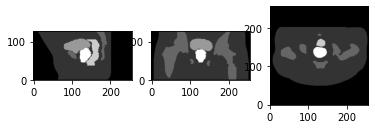

In [40]:
slice_3 = data_label[127, :, :]
slice_4 = data_label[:, 127, :]
slice_5 = data_label[:, :, 63]

show_slices([slice_3, slice_4, slice_5])

In [41]:
label_tf = tf.convert_to_tensor(data_label)

In [46]:
print(label_tf.dtype)
print(type(label_tf))
print(tf.size(label_tf))
print(label_tf.shape)
print(label_tf.dtype)
print(np.amax(label_tf))
print(np.amin(label_tf))


<dtype: 'float64'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(8388608, shape=(), dtype=int32)
(256, 256, 128)
<dtype: 'float64'>
5.0
0.0
